# Linear  Regression (Closed Form) Algorithm
## Definition
Linear Regression is a supervised learning algorithm that is applied to real valued target functions in order to *predict* a range of possible outputs for a given input. The algorithm assumes the targets are close to some linear combination of the featuress of the input data. Unlike other machine learning algorithms, linear regression has a closed-form solution. That is, there is an equation that solves linear regression. 

### Uses
The closed-from linear regression algorithm is commonly used for:
* Predicting outputs from inputs

### Examples
* Can use LR to relate the force for stretching a spring to the distance the spring stretches (Hook's Law)
* Can use LR to relate the salary of a developer to thier age and experience

x=feature, age; y = label, salary(USD)
suppose to we want to know the possible salary for $x^*$? we want a line... how can we find this line? 
solve a system of equations 

$$y^1 = w_1x^1 + w_2$$
$$y^2 = w_1x^2 + w_2$$
$$y^3 = w_1x^3 + w_2$$

$$\left[ {\begin{array}{cc}
x^1 & 1\\
x^2 & 1\\
x^3 & 1\\
 \end{array}} \right]\left[ {\begin{array}{c}
w_1 \\
w_2\\
 \end{array}} \right]
 =
 \left[ {\begin{array}{c}
y^1 \\
y^2 \\
y^3 \\
 \end{array}} \right]$$
 
We want: $$Xw = Y$$

this is likely not invertible, so the best we can do is solve for an approximation, 

say $\hat w$ with $X\hat w \approx y$

$$X^TX\hat w = X^T Y \rightarrow \hat w = (X^TX)^{-1}X^Ty$$
where $(X^TX)^{-1}$ is the *Psuedo-Inverse of $X$*

Prediction is given by the equation $$y \approx  \hat w_1 x^* + \hat w_2$$

### Advantages
* 
*

### Disadvantages
* 

## Linear Regression Implementation 

It is thought that you can predict the nasal the width of a gray kangaroo from it's nasal length. The data set being used to investigate this comes from Cengage and can be found [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html), but is also available as `kangaroo_data.csv` file within this repository.

The data set includes two variables:
* X = nasal length (mm)
* Y = nasal width (mm)

The measurements were taken from randomly sampled male gray kangaroos, displayed in the *Australian Journal of Zoology, Vol. 28, (pages 607-613)*. 

In [47]:
# Import Packages
using Plots
theme(:ggplot2)
using Random
using CSV
using CSV

In [52]:
# Read in data
kangaroos = CSV.read("kangaroo_data.csv", DataFrame);

# Select X and Y data 
length_x = [x for x in kangaroos.X]
width_y = [y for y in kangaroos.Y]

data = [x for x in zip(length_x, width_y)]

# Randomly select data points from the full data set to make a training data set
train_x = randsubseq(length_x, .7)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = [x for x in zip(train_x, train_y)]

test_data = [x for x in data if x ∉ train_data];

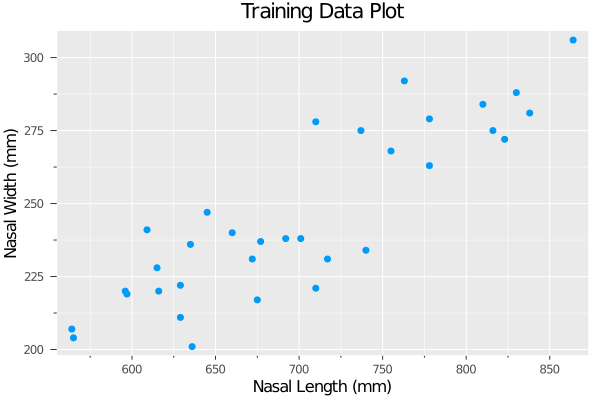

In [53]:
# plot train
scatter([p for p in train_data],
    xaxis = "Nasal Length (mm)",
    yaxis = "Nasal Width (mm)",
    title = "Training Data Plot",
    legend = false)

In [54]:
# First make the matrix X 
X = ones(length(train_x), 2)
X[:,1] = train_x

# Next solve for ŵ
ŵ = (X'X)\(X'*train_y)

# Note: Ax=b, then x=A\b solves the system 

2-element Array{Float64,1}:
  0.29852553265564286
 36.770716825528815

In [55]:
# Define the regression line, i.e., the prediction function 
prediction(x) = ŵ[1]*x + ŵ[2];

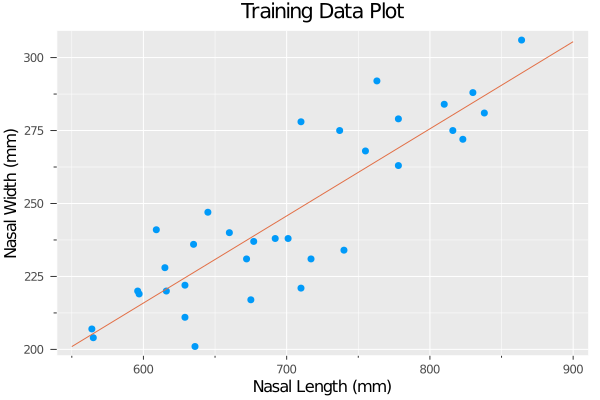

In [59]:
# plot train
scatter([p for p in train_data],
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Training Data Plot",
        legend = false)
plot!([(x,prediction(x)) for x = 550:900])

In [69]:
# check bounds for plotting
minimum(test_data) # 493
maximum(test_data) # 855

(855, 308)

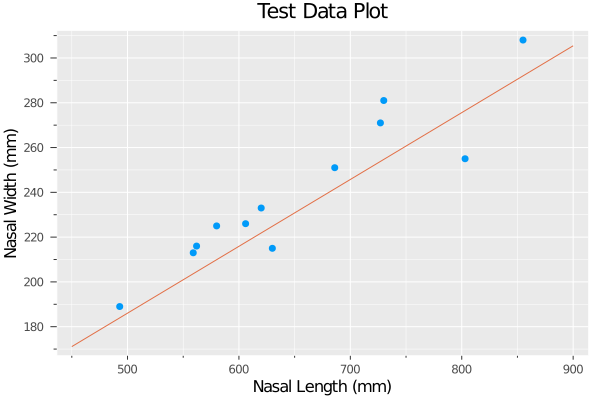

In [75]:
# plot test
scatter([p for p in test_data],
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Test Data Plot",
        legend = false)
plot!([(x,prediction(x)) for x = 450:900])

In [71]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

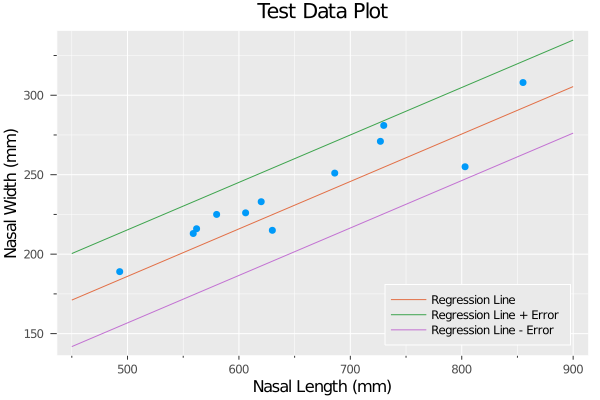

In [74]:
# plot test
scatter([p for p in test_data],
        label = false,
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Test Data Plot",
        legend = :bottomright)
plot!([(x, prediction(x)) for x = 450:900], 
        label = "Regression Line")
plot!([(x, prediction(x) + maximum(error_array)) for x = 450:900], 
        label = "Regression Line + Error")
plot!([(x, prediction(x) - maximum(error_array)) for x = 450:900],
        label = "Regression Line - Error")

In [76]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [77]:
test_data

12-element Array{Tuple{Int64,Int64},1}:
 (620, 233)
 (493, 189)
 (606, 226)
 (630, 215)
 (727, 271)
 (803, 255)
 (855, 308)
 (562, 216)
 (580, 225)
 (559, 213)
 (730, 281)
 (686, 251)

In [80]:
prediction_interval(606) # actual is 226 which falls within this interval

(188.4010346258836, 246.95334460381315)

In [81]:
prediction_interval(700)

(216.46243469551402, 275.0147446734436)